## 엔트로피entropy
* 물리 열역학의 관점에서의 정의
    + 물질의 열적 상태를 나타내는 물리량의 하나
    + 보통 무질서도라고 함
    + 엔트로피가 높으면 무질서도 증가
* 통계적 관점에서의 정의
    + 정보이득information gain의 혼잡도
    + 엔트로피가 높으면 **정보이해가 어려워 짐**    
* 학습데이터는 기본적으로 **혼잡한 상태**임
     + 따라서, 어떤 조건으로 분류해야만 전체 혼잡도가 개선되는지 계산
     + 정리한 결과에 대해 다시 계산해서 처리를 반복 적용함
     + 즉, 정보의 불확실성을 수치로 나타낸 것을 의미 

## 엔트로피의 식
* $ entropy = -\sum p_k \log_2 p_k $
* 복수의 현상(1~n)이 존재할때 그 혼잡도를 나타내는 엔트로피의 식
     + -p(현상1) * log(p(현상1)) + -p(현상2) * log(p(현상2)) + ... ... -p(현상n) * log(p(현상n))
* 참고) 엔트로피는 일반적으로 2를 밑으로 하는 로그로 계산함
    + 단, 자연로그로도 엔트로피를 계산하기도 함  

In [ ]:
# x를 기준으로 y를 나누는 가장 좋은 방법은?
# x = [1,2,3,4,5,6,7,8]
# y = [0,0,0,1,1,1,1,1]

# 방법1) x : 3.5 (최적의 조건)
# 방법2) x : 4.5 (오분류의 가능성 존재)

In [1]:
import math

In [6]:
# ex) 확률 0.1의 현상이 10개 일어난 경우 엔트로피는?
# -p(현상1) * log(p(현상1))
# -0.1 * math.log2(0.1) : 1개 일 땐 0.33219280948873625
-0.1 * math.log2(0.1) * 10

3.3219280948873626

In [8]:
# ex) 확률 0.25의 현상이 4개 일어난 경우 엔트로피는?
-0.25 * math.log2(0.25) * 4

2.0

## 10마리의 동물이 개인지 고양이인지 분류

In [ ]:
# big   follow   walking      class
# yes     yes    yes          dog
# yes     yes    no           cat
# no      yes    yes          dog
# yes     yes    yes          dog
# no      no     yes          cat

# yes     no     yes          dog
# yes     no     yes          cat
# no      no     no           cat
# yes     yes    yes          dog
# no      yes    no           dog

### 1) target에 대한 entropy 계산
* 10마리 중 개는 6, 고양이는 4
* 개로 분류될 확률      = 6/10
* 고양이로로 분류될 확률 = 4/10
* 따라서,  -0.6 * log2(0.6) + -0.4 * log2(0.4)

In [26]:
-0.6 * math.log2(0.6) + -0.4 * math.log2(0.4)

0.9709505944546686

#### 1a) 덩치를 기준으로 분류시 엔트로피 계산
+ 덩치가 큰 것으로 분류 (6) - 개:고양이 = 4:2
+ 덩치가 큰 경우 개로 분류 : 4/6 = 0.667
+ 덩치가 큰 경우 고양이로 분류 : 2/6 = 0.333 
+ -0.667 * log2(0.667) + -0.333 * log2(0.333)

In [28]:
-0.667 * math.log2(0.667) + -0.333 * math.log2(0.333)

0.9179621399872385

#### 1b) 덩치를 기준으로 분류시 엔트로피 계산
+ 덩치가 작은 것으로 분류 (4) - 개:고양이 = 2:2
+ 덩치가 작은 경우 개로 분류 : 2/4 = 0.5
+ 덩치가 작은 경우 고양이로 분류 : 2/4 =  0.5
+ -0.5 * log2(0.5) + -0.5 * log2(0.5)

In [32]:
-0.5 * math.log2(0.5) * 2

1.0

#### 1c) 덩치를 기준으로 분류시 최종 엔트로피 계산
+ 덩치로 분류했을때의 엔트로피는 
+ 개로 분류될 확률 x 덩치로 분류될 확률과   
+ 고양이로 분류될 확률 x 덩치로 분류될 확률을 
+ 더해준 결과값이 됨

In [33]:
0.6 * 0.918 + 0.4 * 1.0

0.9508

#### 2a) 따름을 기준으로 분류시 엔트로피 계산
+ 잘따름으로 분류 (6) - 개:고양이 = 5:1
+ 잘따를 경우 개로 분류 : 5/6 = 0.833
+ 잘따를 경우 고양이로 분류 : 1/6 = 0.166
+ -0.833 * log2(0.833) + -0.166 * log2(0.166)

In [38]:
-(5/6) * math.log2(5/6) + -(1/6) * math.log2(1/6)

0.6500224216483541

#### 2b) 따름을 기준으로 분류시 엔트로피 계산
+ 잘따르지 않을 경우로 분류 (4) - 개:고양이 = 1:3
+ 잘따르지 않을 경우 개로 분류 : 1/4 = 0.25
+ 잘따르지 않을 경우 고양이로 분류 : 3/4 =  0.75
+ -0.25 * log2(0.25) + -0.75 * log2(0.75)

In [39]:
-(1/4) * math.log2(1/4) + -(3/4) * math.log2(3/4)

0.8112781244591328

#### 2c) 따름을 기준으로 분류시 최종 엔트로피 계산

In [41]:
0.6 * 0.650 + 0.4 * 0.811

0.7144

#### 3a) 산책을 기준으로 분류시 엔트로피 계산
+ 산책으로 분류 (7) - 개:고양이 = 5:2
+ 산책할 경우 개로 분류 : 5/7 = 0.714
+ 산책할 경우 고양이로 분류 : 2/7 =  0.285
+ -0.714 * log2(0.714) + - 0.285 * log2(0.285)

In [43]:
-(5/7) * math.log2(5/7) + -(2/7) * math.log2(2/7)

0.863120568566631

#### 3b) 산책을 기준으로 분류시 엔트로피 계산
+ 산책으로 분류 (3) - 개:고양이 = 1:2
+ 산책할 경우 개로 분류 : 1/3 = 
+ 산책할 경우 고양이로 분류 : 2/3 =  

In [44]:
-(1/3) * math.log2(1/3) + -(2/3) * math.log2(2/3)

0.9182958340544896

#### 3c) 산책을 기준으로 분류시 최종 엔트로피 계산

In [45]:
0.6 * 0.863 + 0.4 * 0.918

0.885

### 4) 최종결론
+ 덩치, 따름, 산책여부에 따라 정보의 불확실 수치들을 비교
    * 덩치 : 0.970 -> 0.9508
    * `따름 : 0.970 -> 0.7144`
    * 산책 : 0.970 -> 0.885

### 개/고양이 의사결정나무로 분류하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [12]:
import pydotplus
from sklearn import tree
import matplotlib.image as pltimg

In [26]:
catdog = pd.read_csv('./data/catdog.csv')
catdog.head()

,big,follow,walking,class
0,yes,yes,yes,dog
1,yes,yes,no,cat
2,no,yes,yes,dog
3,yes,yes,yes,dog
4,no,no,yes,cat


#### 레이블 인코딩 실시

In [17]:
#from sklearn.preprocessing import LabelEncoder

In [21]:
# encoder = LabelEncoder()
# encoder.fit(catdog.big)
# catdog['big2'] = encoder.transform(catdog.big)
# catdog['follow2'] = encoder.transform(catdog.follow)
# catdog['walking2'] = encoder.transform(catdog.walking)

In [24]:
# encoder = LabelEncoder()
# encoder.fit(catdog['class'])
# catdog['class2'] = encoder.transform(catdog['class'])

In [27]:
# pd.Categorical(변수), 변수.cat.codes
cols = ['big','follow','walking','class']

for col in cols:
    catdog[col] = pd.Categorical(catdog[col])
    catdog[col] = catdog[col].cat.codes

In [28]:
catdog.head()

,big,follow,walking,class
0,1,1,1,1
1,1,1,0,0
2,0,1,1,1
3,1,1,1,1
4,0,0,1,0


#### 데이터 분할

In [31]:
data = catdog.iloc[:, :3]
target = catdog['class']

In [37]:
# 의사결정나무 분석
dtclf = DecisionTreeClassifier(criterion='entropy', # 지정하지 않으면 기본값은 gini임
                               random_state=2309251505)
dtclf.fit(data, target)

dtclf.score(data, target)

0.9

In [38]:
dot_data = tree.export_graphviz(dtclf, out_file=None, feature_names=data.columns,
                               class_names=['cat', 'dog'])

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('./img/tree_catdog.png')

True

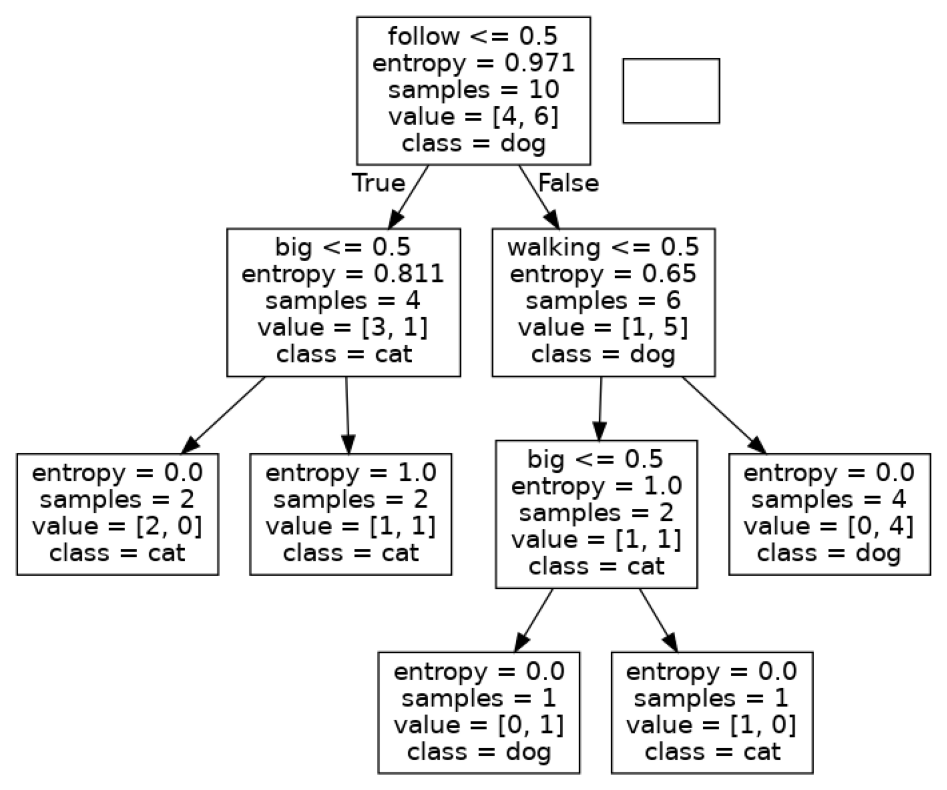

In [39]:
img = pltimg.imread('./img/tree_catdog.png')

plt.figure(figsize=(12,8))
plt.imshow(img)
plt.axis('off')
plt.tight_layout()